# Innomatics Research Labs
## Internship September
### Task_2 - Last Mile Delivery Analysis



##### <u>PROBLEM STATEMENT</u>
* Kanav has started an online pizza store (franchise DIMINOS)
* Audit Schedule for kanav
* Kanav's concern - Delivery Time(within 30 mins after order placed) and Customer Satisfaction(quality of product-pizza)
* Facing difficulty in capacity planning for delivery fleet



##### <u>TASK STATEMENT</u>
* Understand store performance - potential areas for improvement
* Analyze order arrival and delivery times
* Give insights to keep his business up and running




#### Import Libraries

In [235]:
import pandas as pd
import numpy as np
from datetime import datetime

#### Data Description
There are 4 datasets with following features, given for this problem statement i.e. 
* <b>Deliveries</b> -   : Order_Id , Time_stamp , Status 
* <b>Order_Items</b> -  : Order_Id , Items_Ordered
* <b>Orders</b> -       : Order_Id , OrderPlacedAt
* <b>Products</b> -     : Item_id, Categories, Items, Size, Price

In [238]:
#Load Datasets
deliveries_df = pd.read_csv("deliveries.csv")
orders_df = pd.read_csv("orders.csv")

In [240]:
deliveries_df.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [242]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [244]:
deliveries_df.columns

Index(['order_id', 'time_stamp', 'status'], dtype='object')

In [246]:
orders_df.columns

Index(['order_id', 'order_placed_at'], dtype='object')

In [248]:
#convert datatypes of 'time_stamp' and 'order_placed_at' into datetime format

deliveries_df['time_stamp'] = pd.to_datetime(deliveries_df['time_stamp'])
orders_df['order_placed_at'] = pd.to_datetime(orders_df['order_placed_at'])

In [249]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   order_id    1363008 non-null  int64         
 1   time_stamp  1363008 non-null  datetime64[ns]
 2   status      1363008 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


In [252]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.9 MB


In [254]:
#filter the deliveries to keep only delievred orders
#we want to keep those rows only where the status is "Delivered"

#Filter deliveries with "Delivered" status and make an explicit copy
delivered_orders = deliveries_df[deliveries_df['status'] == 'Delivered'].copy()

In [256]:
delivered_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454336 entries, 2 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    454336 non-null  int64         
 1   time_stamp  454336 non-null  datetime64[ns]
 2   status      454336 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.9+ MB


In [259]:
#merge the two dataframes- 'delievered_orders' and 'orders' on "order_id" 
#merged data = delivery time data
merged_data = pd.merge(delivered_orders, orders_df, on='order_id')

In [261]:
#calculate the delivery time - difference between "order_placed_at" and "time_stamp"
# convert into minutes
merged_data['delivery_time_minutes'] = (merged_data['time_stamp'] - merged_data['order_placed_at']).dt.total_seconds() / 60


In [263]:
#calculate average delivery time-find mean of column- ['delivery_time_minutes'] 
average_delivery_time = merged_data['delivery_time_minutes'].mean()
print(f'Average Delivery Time: {average_delivery_time:.2f} minutes')

Average Delivery Time: 20.65 minutes


###### <b>Question_1 - What is the average Delivery Time(in minutes) taken by the store to deliver the pizza?</b>

###### Answer - Average Delivery Time: 20.65 minutes

In [266]:
# Ensure the 'delivery_time_minutes' column exists
merged_data[['delivery_time_minutes']].head()
#This column should have the time difference in minutes between the order placement and delivery.

,delivery_time_minutes
0,17.738319
1,23.267581
2,18.852551
3,17.290501
4,18.124810


In [268]:
#Calculate the 99th Percentile Delivery Time-calculate the delivery time below which 99% of all deliveries fall.
percentile_99 = np.percentile(merged_data['delivery_time_minutes'], 99)
print(f'99th Percentile Delivery Time: {percentile_99:.2f} minutes')

99th Percentile Delivery Time: 30.90 minutes


###### <b>Question_2 - What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?</b>

###### Answer - 99th Percentile Delivery Time: 30.90 minutes.

###### <b>Question_3 - Which metric is the better choice to determine the stores performance based on Delivery Time?</b>

###### Answer -The 99th percentile delivery time is the better metric to assess the store’s performance because it tells the time by which nearly all customers (99%) receive their orders within 30.90 minutes.

In [272]:
merged_data.head()

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes
0,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319
1,321230115,2020-12-11 00:59:18.054846609,Delivered,2020-12-11 00:36:02,23.267581
2,321230116,2020-12-11 01:13:52.153042625,Delivered,2020-12-11 00:55:01,18.852551
3,321230117,2020-12-11 01:22:44.430088094,Delivered,2020-12-11 01:05:27,17.290501
4,321230118,2020-12-11 01:32:27.488575946,Delivered,2020-12-11 01:14:20,18.124810


In [274]:
# Find the row with the maximum delivery time
max_deliveryTime_row = merged_data.loc[merged_data['delivery_time_minutes'].idxmax()]

In [276]:
max_deliveryTime_row

order_id                                     321629049
time_stamp               2023-09-21 16:52:49.724687723
status                                       Delivered
order_placed_at                    2023-09-21 15:49:55
delivery_time_minutes                        62.912078
Name: 398957, dtype: object

In [278]:
# Extract the order ID and maximum delivery time
max_order_id = max_deliveryTime_row['order_id']
max_delivery_time = max_deliveryTime_row['delivery_time_minutes']

In [280]:
print(f"Order ID with the maximum delivery time: {max_order_id}")
print(f"Maximum Delivery Time: {max_delivery_time:.2f} minutes")

Order ID with the maximum delivery time: 321629049
Maximum Delivery Time: 62.91 minutes


###### <b>Question_4 - What is the order id with the maximum delivery time?</b>
###### Answer - Order ID with the maximum delivery time: 321629049. (Maximum Delivery Time: 62.91 minutes)



In [283]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [285]:
#orders_df.info()
#Define the date range for January 2024
start_date = '2024-01-01'
end_date = '2024-01-31'
#Filter orders within the date range
january_orders = orders_df[(orders_df['order_placed_at'] >= start_date) & (orders_df['order_placed_at'] <= end_date)]
#Count the number of orders
number_of_orders = january_orders.shape[0]
print(f"Number of pizzas ordered between 1st and 31st January 2024: {number_of_orders}")

Number of pizzas ordered between 1st and 31st January 2024: 11894


###### <b>Question_5 - How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?</b>

###### Answer - Number of pizzas ordered between 1st and 31st January 2024: 11894

In [288]:
#Filter orders that were placed in the date range
january_orders = merged_data[(merged_data['order_placed_at'] >= start_date) & (merged_data['order_placed_at'] <= end_date)]
#january_orders

In [290]:
#Filter orders where the delivery time is greater than 30 minutes
orders_over_30_min = january_orders[january_orders['delivery_time_minutes'] > 30]

#Count the number of such orders
numberOforders_over_30_min = orders_over_30_min.shape[0]
print(f"Number of orders that took more than 30 minutes to deliver in January 2024: {numberOforders_over_30_min}")

Number of orders that took more than 30 minutes to deliver in January 2024: 158


###### <b>Question_6 - How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?</b>
######                 <b>This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.</b>

###### Answer - Number of orders that took more than 30 minutes to deliver in January 2024: 158

In [293]:
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")

In [295]:
order_items_df.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [297]:
products_df.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [299]:
deliveries_2023 = deliveries_df[deliveries_df['time_stamp'].dt.year == 2023]
deliveries_2023.head()

,order_id,time_stamp,status
871508,321520618,2023-01-01 00:02:59.000000000,Out For Delivery
871509,321520615,2023-01-01 00:06:16.751226144,Delivered
871510,321520614,2023-01-01 00:07:13.392937318,Delivered
871511,321520613,2023-01-01 00:07:33.244922300,Delivered
871512,321520619,2023-01-01 00:08:58.000000000,Pending


In [301]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [303]:
# Merge with the orders table to get the orderPlacedAt timestamp
#orders_df['order_placed_at'] = pd.to_datetime(orders_df['order_placed_at'])
merged_df = pd.merge(deliveries_2023, orders_df, on='order_id')

In [305]:
merged_df.head()

,order_id,time_stamp,status,order_placed_at
0,321520618,2023-01-01 00:02:59.000000000,Out For Delivery,2022-12-31 23:57:59
1,321520618,2023-01-01 00:17:55.509366779,Delivered,2022-12-31 23:57:59
2,321520615,2023-01-01 00:06:16.751226144,Delivered,2022-12-31 23:47:48
3,321520614,2023-01-01 00:07:13.392937318,Delivered,2022-12-31 23:49:52
4,321520613,2023-01-01 00:07:33.244922300,Delivered,2022-12-31 23:45:10


In [307]:
#Calculate the time difference in minutes (delivery_time in minutes)
merged_df['delivery_time_minutes'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60

In [309]:
merged_df.head().head()

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes
0,321520618,2023-01-01 00:02:59.000000000,Out For Delivery,2022-12-31 23:57:59,5.000000
1,321520618,2023-01-01 00:17:55.509366779,Delivered,2022-12-31 23:57:59,19.941823
2,321520615,2023-01-01 00:06:16.751226144,Delivered,2022-12-31 23:47:48,18.479187
3,321520614,2023-01-01 00:07:13.392937318,Delivered,2022-12-31 23:49:52,17.356549
4,321520613,2023-01-01 00:07:33.244922300,Delivered,2022-12-31 23:45:10,22.387415


In [311]:
# Filter out late deliveries
# Assume a late delivery is one where the delivery time exceeds 30 minutes
late_deliveries = merged_df[(merged_df['status'] == 'Delivered') & (merged_df['delivery_time_minutes'] > 30)]

In [313]:
late_deliveries.head()

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes
282,321520710,2023-01-01 07:13:53.796142791,Delivered,2023-01-01 06:43:17,30.613269
495,321520781,2023-01-01 12:21:27.548250439,Delivered,2023-01-01 11:50:08,31.325804
789,321520881,2023-01-01 16:09:22.481604124,Delivered,2023-01-01 15:32:36,36.774693
903,321520917,2023-01-01 18:05:14.271442042,Delivered,2023-01-01 17:33:28,31.771191
996,321520947,2023-01-01 19:33:06.691488219,Delivered,2023-01-01 19:01:40,31.444858


In [315]:
#Join with orderitems to get the ordered items for late deliveries
late_orders_with_items = pd.merge(late_deliveries, order_items_df, on='order_id')

In [317]:
late_orders_with_items.head()

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,items_ordered
0,321520710,2023-01-01 07:13:53.796142791,Delivered,2023-01-01 06:43:17,30.613269,"['p_020', 'p_030', 'p_037']"
1,321520781,2023-01-01 12:21:27.548250439,Delivered,2023-01-01 11:50:08,31.325804,"['p_003', 'p_023']"
2,321520881,2023-01-01 16:09:22.481604124,Delivered,2023-01-01 15:32:36,36.774693,"['p_023', 'p_005', 'p_037']"
3,321520917,2023-01-01 18:05:14.271442042,Delivered,2023-01-01 17:33:28,31.771191,"['p_019', 'p_035', 'p_037']"
4,321520947,2023-01-01 19:33:06.691488219,Delivered,2023-01-01 19:01:40,31.444858,"['p_034', 'p_024', 'p_037']"


In [319]:
# Convert Items_ordered string representation of lists to actual lists if necessary
if isinstance(late_orders_with_items['items_ordered'].iloc[0], str):
    late_orders_with_items['items_ordered'] = late_orders_with_items['items_ordered'].apply(eval)

In [321]:
#Explode the Items_ordered column to get individual items in each row
late_orders_with_items_exploded = late_orders_with_items.explode('items_ordered')

In [323]:
products_df.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [325]:
#Join with products to get the prices of the items ordered
final_df = pd.merge(late_orders_with_items_exploded, products_df, left_on='items_ordered', right_on='item_id')

In [327]:
final_df.head(5)

,order_id,time_stamp,status,order_placed_at,delivery_time_minutes,items_ordered,item_id,category,Item,Size,Price
0,321520710,2023-01-01 07:13:53.796142791,Delivered,2023-01-01 06:43:17,30.613269,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
1,321523844,2023-01-07 10:17:39.894128522,Delivered,2023-01-07 09:47:24,30.264902,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
2,321525806,2023-01-11 14:29:26.682538409,Delivered,2023-01-11 13:59:22,30.078042,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
3,321527280,2023-01-14 17:29:41.131003440,Delivered,2023-01-14 16:54:16,35.418850,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
4,321530066,2023-01-21 23:06:44.471199612,Delivered,2023-01-21 22:34:13,32.524520,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499


In [329]:
#Calculate total refund amount for late deliveries
# Assuming the refund is the full price of the items in case of late delivery
total_refund = final_df['Price'].sum()

print(f"Total refund amount for late deliveries in 2023: ${total_refund}")

Total refund amount for late deliveries in 2023: $1826393


###### <b>Question_7 - What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?</b>
###### Answer - Yhe total amount Pizza store lost in 2023 due to refunds on late deliveries $1826393

In [332]:
deliveries_df.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [334]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [336]:
#Merge deliveries and orders to get the orderPlacedAt timestamp
merged_df1 = pd.merge(deliveries_df, orders_df, on='order_id')

In [338]:
merged_df1.head()

,order_id,time_stamp,status,order_placed_at
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02


In [340]:
#Calculate the time difference in minutes (delivery_time in minutes)
# merged_df1['delivery_time_minutes'] = (merged_df1['time_stamp'] - merged_df1['order_placed_at']).dt.total_seconds() / 60
#Filter out late deliveries (more than 30 minutes)
# late_deliveries1 = merged_df1[(merged_df1['status'] == 'Delivered') & (merged_df1['delivery_time_minutes'] > 30)]
#Join with orderitems to get the ordered items for late deliveries
# late_orders_with_items1 = pd.merge(late_deliveries1, order_items_df, on='order_id')
#Convert Items_ordered string representation of lists to actual lists if necessary
# if isinstance(late_orders_with_items1['items_ordered'].iloc[0], str):
#     late_orders_with_items1['items_ordered'] = late_orders_with_items1['items_ordered'].apply(eval)

#Explode the Items_ordered column to get individual items in each row
# late_orders_with_items_exploded1 = late_orders_with_items1.explode('items_ordered')

#Join with products to get the prices of the items ordered
# final_df1 = pd.merge(late_orders_with_items_exploded1, products_df, left_on='items_ordered', right_on='item_id')

#Extract the year from the orderPlacedAt timestamp
# final_df1['year'] = final_df1['order_placed_at'].dt.year

#Calculate the total refund amount for each year
#Assuming the refund is the full price of the items in case of late delivery
# refunds_per_year = final_df1.groupby('year')['Price'].sum().reset_index()

#Find the year with the maximum refund amount
# max_refund_year = refunds_per_year.loc[refunds_per_year['Price'].idxmax()]

# print(f"The year with the maximum refund due to late deliveries: {max_refund_year['year']}")
# print(f"Total refund amount in that year: ${max_refund_year['Price']}")

In [342]:
#Extract the year from the orderPlacedAt timestamp
final_df['year'] = final_df['order_placed_at'].dt.year
#Calculate the total refund amount for each year
#Assuming the refund is the full price of the items in case of late delivery
refunds_per_year = final_df.groupby('year')['Price'].sum().reset_index()

#Find the year with the maximum refund amount
max_refund_year = refunds_per_year.loc[refunds_per_year['Price'].idxmax()]

print(f"The year with the maximum refund due to late deliveries: {max_refund_year['year']}")
print(f"Total refund amount in that year: ${max_refund_year['Price']}")

The year with the maximum refund due to late deliveries: 2023
Total refund amount in that year: $1826393


###### <b>Question_8 - In which year Pizza store has lost maximum amount due to refunds on late deliveries?</b>
###### Answer - The year with the maximum refund amount due to late deliveries: 2023 ($1826393)

In [355]:
order_items_df.head()

,order_id,items_ordered
0,321230114,"[p_025, p_032, p_037]"
1,321230115,"[p_017, p_012]"
2,321230116,"[p_027, p_037]"
3,321230117,"[p_004, p_029]"
4,321230118,"[p_017, p_037]"


In [381]:
#Fix 'items_ordered' column by applying eval() only to strings
def convert_to_list(items):
    if isinstance(items, str):
        return eval(items)  # Convert string representation of list to actual list
    return items  # If already a list, return as is

order_items_df['items_ordered'] = order_items_df['items_ordered'].apply(convert_to_list)

#Explode the 'Items_ordered' column to match individual items
orderitems_exploded = order_items_df.explode('items_ordered')

#Merge orderitems with products to get the prices of the items ordered
all_orders_with_prices = pd.merge(orderitems_exploded, products_df, left_on='items_ordered', right_on='item_id')


#Calculate total revenue by summing the price of all ordered items
total_revenue = all_orders_with_prices['Price'].sum()

# Output the total revenue
print(f"Total revenue generated by the pizza store till date: ${total_revenue}")

Total revenue generated by the pizza store till date: $407834487


In [385]:
#Identify late deliveries (calculate refund amount)
# Merge deliveries with orders to calculate delivery times
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df['delivery_time_minutes'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60

# Filter out late deliveries
late_deliveries = merged_df[(merged_df['status'] == 'Delivered') & (merged_df['delivery_time_minutes'] > 30)]

# Join with orderitems to get ordered items for late deliveries
late_orders_with_items = pd.merge(late_deliveries, order_items_df, on='order_id')

# Explode the Items_ordered column for late deliveries
late_orders_with_items_exploded = late_orders_with_items.explode('items_ordered')

# Merge with products to get the prices of items in late deliveries
late_orders_with_prices = pd.merge(late_orders_with_items_exploded, products_df, left_on='items_ordered', right_on='item_id')

#Calculate total refund amount for late deliveries
total_refund = late_orders_with_prices['Price'].sum()

In [389]:
print(total_revenue)
print(total_refund)

407834487
5524431


In [393]:
#Calculate net revenue by subtracting refunds from total revenue
net_revenue = total_revenue - total_refund

print(f"Total revenue generated by the pizza store till date (excluding refunds): ${net_revenue}")

Total revenue generated by the pizza store till date (excluding refunds): $402310056


###### <b>Question_9 - How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.</b>
###### Answer - Total revenue generated by the pizza store till date (excluding refunds): $402310056

#### BONUS QUESTION 

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [415]:
#Filter deliveries with "Delivered" status and make an explicit copy
#delivered_orders = deliveries_df[deliveries_df['status'] == 'Delivered'].copy()

# Extract the date and hour of delivery
delivered_orders['hour'] = delivered_orders['time_stamp'].dt.hour
delivered_orders['date'] = delivered_orders['time_stamp'].dt.date

# Group by date and hour to get the number of orders per hour
#to get the number of orders made in each hour of the day across different days
orders_per_hour = delivered_orders.groupby(['date', 'hour']).size().reset_index(name='order_count')
print(orders_per_hour)

             date  hour  order_count
0      2020-12-11     0            2
1      2020-12-11     1            5
2      2020-12-11     2            4
3      2020-12-11     3            5
4      2020-12-11     4            9
...           ...   ...          ...
27459  2024-01-31    20           16
27460  2024-01-31    21            9
27461  2024-01-31    22            8
27462  2024-01-31    23            8
27463  2024-02-01     0            2

[27464 rows x 3 columns]


In [417]:
#Fit Poisson Distribution

# Calculate the average number of orders per hour
lambda_est = orders_per_hour['order_count'].mean()
print(f"Estimated average number of orders per hour (lambda): {lambda_est:.2f}")

Estimated average number of orders per hour (lambda): 16.54


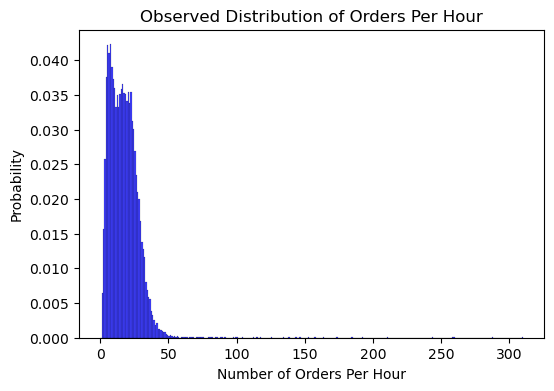

In [421]:
# Plot the observed number of orders per hour
plt.figure(figsize=(6,4))
sns.histplot(orders_per_hour['order_count'], bins=range(0, max(orders_per_hour['order_count'])+2), kde=False, stat='probability', color='blue')
plt.title("Observed Distribution of Orders Per Hour")
plt.xlabel("Number of Orders Per Hour")
plt.ylabel("Probability")
plt.show()

##### Insight:
* The distribution is narrow, the number of orders per hour is fairly consistent.
* It indicates consistent demand, and the store can optimize with fixed scheduling.

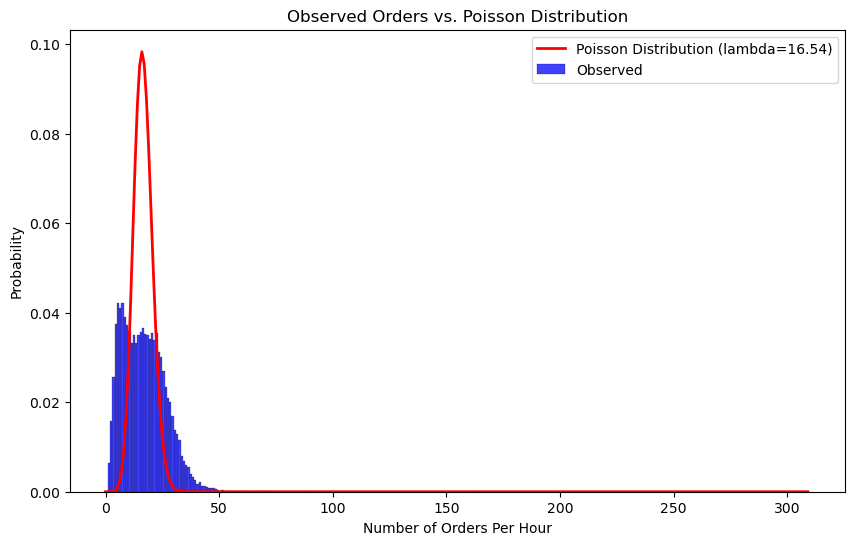

In [423]:
#Poisson Distribution Comparison

# Generate Poisson distribution probabilities based on the estimated lambda
x = np.arange(0, max(orders_per_hour['order_count']) + 1)
poisson_probs = poisson.pmf(x, lambda_est)

# Plot the Poisson distribution and compare with observed data
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_hour['order_count'], bins=range(0, max(orders_per_hour['order_count'])+2), kde=False, stat='probability', color='blue', label='Observed')
plt.plot(x, poisson_probs, 'r-', lw=2, label=f'Poisson Distribution (lambda={lambda_est:.2f})')
plt.title("Observed Orders vs. Poisson Distribution")
plt.xlabel("Number of Orders Per Hour")
plt.ylabel("Probability")
plt.legend()
plt.show()

##### Insight:
* The two plots(blue histogram and red line) align well, the assumption that orders per hour follow a Poisson process is validated,
  meaning order volume is random but occurs at a constant rate.

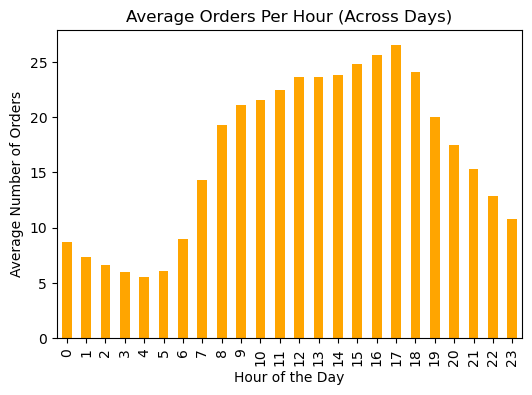

In [427]:
#Analyze Daily and Hourly Trends
# Group by hour to find average orders per hour over multiple days
hourly_avg_orders = orders_per_hour.groupby('hour')['order_count'].mean()

plt.figure(figsize=(6,4))
hourly_avg_orders.plot(kind='bar', color='orange')
plt.title("Average Orders Per Hour (Across Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Orders")
plt.show()

##### Insight: 
* Helps to identify peak and off-peak hours.
* From 3PM to 6PM(Peak order time)  is the time when more orders are placed.
* Before and after the above time range orders get decreased gradually.
* This information helps the owner plan for staffing and kitchen efficiency during these hours.

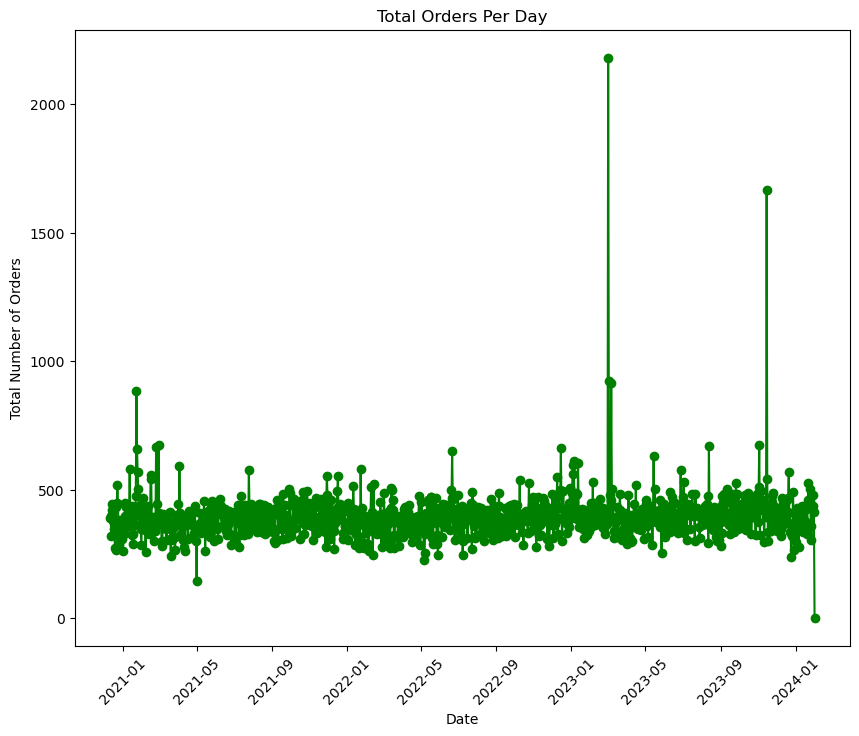

In [445]:
#Group by day to analyze total orders per day
daily_orders = delivered_orders.groupby('date').size().reset_index(name='total_orders')

plt.figure(figsize=(10,8))
plt.plot(daily_orders['date'], daily_orders['total_orders'], marker='o', color='green')
plt.title("Total Orders Per Day")
plt.xlabel("Date")
plt.ylabel("Total Number of Orders")
plt.xticks(rotation=45)
plt.show()




##### Insight: 
* Shows the total number of orders received each day, providing whether certain days have more orders
* There is some significant drops in number of orders in some days-
* Suggested to run promotions or discounts to boost sales during low periods.

###### <b>Question_10 - (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? </b>


###### Answer:
###### (a)
* To model the number of orders incoming each hour, <b>"Poisson distribution"</b> is a commonly used statistical distribution.
* Several key operational problems for the owner of the pizza store can be addressed:
   * Delivery Time Optimization
   * Customer Experience and Satisfaction
   * Capacity Planning
   * Staffing Optimization
   * Resource Management
   * Improved Forecasting and Demand Planning

###### (b)
###### <b>More details</b>
* By predicting the number of orders in each hour, the owner can allocate more delivery drivers during peak times, ensuring that deliveries are made promptly. Additionally, if orders are expected to be low during certain hours, fewer drivers can be assigned, reducing unnecessary costs while still maintaining efficiency.
* By modeling the order rate, the owner can recognize when the kitchen or delivery fleet may become overloaded and plan ahead. For example, they might invest in more ovens, hire more staff, or use third-party delivery services during peak periods.
* If the model predicts high order volumes during lunch and dinner hours, the owner can increase staff during those periods and reduce staff during slower times.
* For instance, during periods with higher predicted order volumes, more ingredients can be stocked to avoid shortages. Conversely, for low-demand periods, the owner can reduce the inventory to minimize waste.
* By using a Poisson distribution model to predict incoming orders, the owner can plan marketing strategies better. For example, if certain hours of the day consistently show low order volumes, the owner can introduce discounts or special offers during these times to increase demand and balance the order flow.
* The owner can forecast revenue and costs more accurately, enabling better financial planning.

###### Other Note: 
* Apart from the Poisson distribution, there are other statistical and machine learning approaches that could be used to model the number of incoming orders per hour
i.e. Time series models like ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA),Linear/Logistic Regression, etc considering to some different context of the Pizza order problem.
But most of the required questions are answered with poisson distribution.

###### Hope this will help you and give solutions to improving business to some extent! 
### THANK YOU 